Paddle: 10 x 2 px @ 8,9,10 px & 73,74,75 vertical (counting from 0)
        paddles can go out of the picture.
        paddle form 0.45882353 0.5764706  0.48235294
        
Ball:   3 x 4 px
         should be 
             XX
            XXXX
           XXXXXX
            XXXX
             XX 
        ball form:             0.827451   0.4392157
                    0.5529412  0.91764706 0.44313726
                    0.57254905 0.7490196
                    0.57254905 0.7490196

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import unittest
import random


In [3]:
val_data = np.load('val_data20kFEB23.npy')

[[0.34117648 0.34117648 0.34117648 ... 0.34117648 0.34117648 0.34117648]
 [0.34117648 0.34117648 0.34117648 ... 0.34117648 0.34117648 0.34117648]
 [0.34117648 0.34117648 0.34117648 ... 0.34117648 0.34117648 0.34117648]
 ...
 [0.34117648 0.34117648 0.34117648 ... 0.34117648 0.34117648 0.34117648]
 [0.34117648 0.34117648 0.34117648 ... 0.34117648 0.34117648 0.34117648]
 [0.56078434 0.56078434 0.56078434 ... 0.56078434 0.56078434 0.56078434]]


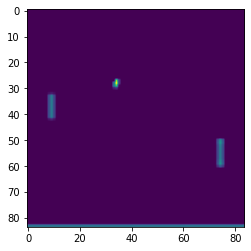

In [4]:
print(val_data[170])
plt.imshow(val_data[170])
plt.show()

In [28]:
print(val_data[170][26])

[0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648
 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648 0.34117648]


In [2]:
#*******************
# Generates data from input
# :p1 left upper corner left paddle [-10, 84]
# :p2 left upper corner right paddle [-10, 84]
# :xBall, yBall coordinates ball center [1, 82] x [2, 82] (should not touch walls)
# return sample image Y x X (first coordinate is y)
#
#********************

def sample(p1, p2, xBall, yBall):
    assert -10 <= p1 and p1  <= 84, 'p1 out of range'
    assert -10 <= p2 and p2  <= 84, 'p2 out of range'
    assert 1 <= xBall and xBall <= 82, 'xBall out of range'
    assert 2 <= yBall and yBall <= 82, 'yBall out of range'
    
    arr = np.zeros((84, 84))

    for i in range(p1, p1 + 10):
        if i < 0 or i > 83: continue
        arr[i][8:11] = 1
        
    for i in range(p2, p2 + 10):
        if i < 0 or i > 83: continue
        arr[i][73:76] = 1
    
    for i in range(yBall-2, yBall+2):
        arr[i][xBall-1:xBall+2] = 1
    
    return arr

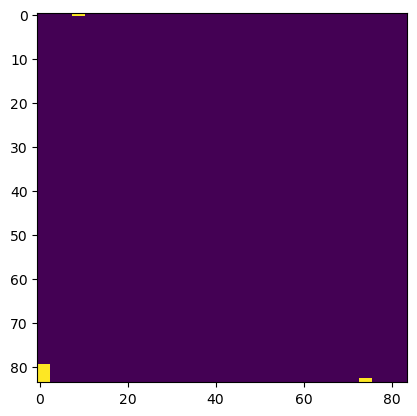

In [3]:
plt.imshow(sample(-9, 83, 1,82))
plt.show()

Generate Training and validation data

In [4]:
train_length = 100000 #100k
val_length = 20000    #20k
train_data = []
val_data = []

In [5]:
print("training data")
for i in range(train_length):
    p1 = random.randrange(-10,84,1)
    p2 = random.randrange(-10,84,1)
    xBall = random.randrange(1,82,1)
    yBall = random.randrange(1,82,1)
    train_data.append(sample(p1, p2, xBall, yBall))
    if i % 1000 == 0: print(i)
        
print("validation data")
for i in range(val_length):
    p1 = random.randrange(-10,84,1)
    p2 = random.randrange(-10,84,1)
    xBall = random.randrange(1,82,1)
    yBall = random.randrange(1,82,1)
    val_data.append(sample(p1, p2, xBall, yBall))
    if i % 1000 == 0: print(i)

training data
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
validation data
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


100000
20000


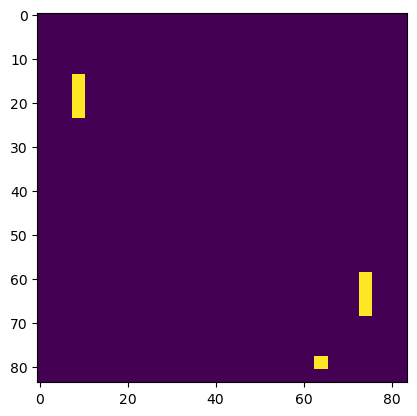

In [6]:
print(len(train_data))
print(len(val_data))
plt.imshow(train_data[6])
plt.show()

Convert to float 32 from double64

In [7]:
tain_data_np = np.asarray(train_data)
val_data_np = np.asarray(val_data)

In [8]:
val_data_np.dtype
tain_data_np.dtype

dtype('float64')

In [9]:
train_data_np2 = tain_data_np.astype(dtype=np.float32)
val_data_np2 = val_data_np.astype(dtype=np.float32)
print(val_data_np2.dtype)
print(train_data_np2.dtype)

float32
float32


In [10]:
np.save( "train_data100kMAR22", train_data_np2)
np.save( "val_data20kMAR22", val_data_np2)